# 18.S190/6.S090 Problem Set 3

Due Friday 2/28 at **11:59pm**; 20% penalty if it is turned in within 24 hours, and after that late psets will not be accepted.   Submit in PDF format: a decent-quality scan/image of any handwritten solutions (e.g. get a scanner app on your phone or use a tablet), combined with a PDF printout of your Jupyter notebook showing your code and (clearly labeled) results.

## Problem 1 (2+4+4+4+3+3 points)

When interpolating polynomials from a "tensor product grid" in multiple dimensions, it turns out that you can get dramatically better efficiency by **interpolating along one dimension at a time**.  In this problem, you will investigate that process in two dimensions.

Suppose that we have an $(M+1) \times (N+1)$ grid of points $(x_m, y_n)$ (for some $x_0, x_1, \ldots, x_M$ and $y_0, y_1, \ldots, y_N$), like the one shown below:

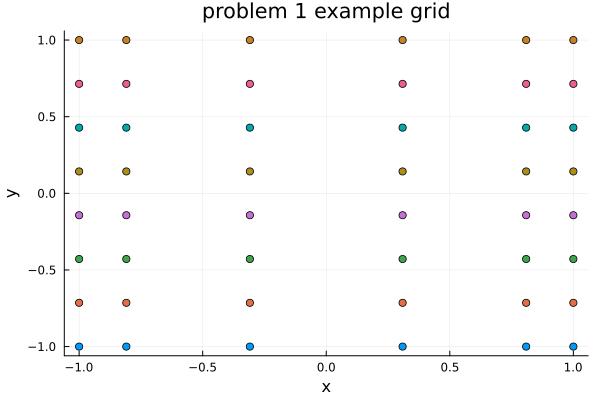

In [3]:
M, N = 5, 7
x = cos.(range(0, pi, length=M+1)) # Chebyshev grid in x
y = range(-1, 1, length=N+1) # equispaced grid in y
using Plots
scatter(x .* ones(N+1)', ones(M+1) .* y', title="problem 1 example grid", xlabel="x", ylabel="y", legend=false)

We have function values on this grid, $Z_{m,n} = f(x_m, y_n)$ for some function $f(x,y)$, which we store in an $(M+1) \times (N+1)$ matrix $Z$.

Now, we want to interpolate $Z$ with a two-variable polynomial
$$p(x,y) = \sum_{m=0}^{M} \sum_{n=0}^{N} C_{m,n} x^m y^n \, ,$$
for coefficients stored in an $(M+1) \times (N+1)$ matrix $C$, satisfying the interpolation conditions $p(x_m, y_n) = Z_{m,n}$.

**(a)** One way to solve for $C$ is to "flatten" or ["vectorize"](https://en.wikipedia.org/wiki/Vectorization_%28mathematics%29) the unknown coefficients $C$ into a column vector $c$ (e.g. by `vec(C)` in Julia or equivalently `C.flatten('F')` in NumPy), and similarly vectorize $Z$ into a vector.   You then solve an equation $Ac = z$ for $c$, where $A$ is the Vandermonde matrix of all our basis functions $x^m y^n$.    If you solve this in the usual way (with Gaussian elimination / LU factorization), **how does the computational cost scale** with $M$ and $N$?  (i.e. $O(M^3 N^{17})$ or ....?  How big are $A$, $c$, and $z$?)

**(b)** Consider the case $M=N=1$ where you are just doing bilinear interpolation from 4 points, as in class.  **Show by explicit 2×2 (symbolic) multiplication** that polynomial interpolation corresponds to the matrix equation: 
$$
X C Y^T = Z
$$
where $X = \begin{pmatrix} 1 & x_0 \\ 1 & x_1 \end{pmatrix}$ and $Y = \begin{pmatrix} 1 & y_0 \\ 1 & y_1 \end{pmatrix}$ are the "1d" Vandermonde matrices for fitting to degree-1 polynomials in $x$ and $y$, respectively.  **That is, show that:**
$$
X C Y^T = \begin{pmatrix} p(x_0, y_0) & p(x_0, y_1)\\ p(x_1, y_0) & p(x_1, y_1) \end{pmatrix}
$$
is just our desired bilinear polynomial $p(x,y) = C_{0,0} + C_{1,0} x + C_{0,1} y + C_{1,1} xy$.

**(c)** Generalize your answer from the previous part to *any* number of points and degree: show that the coefficients *always* solve $X C Y^T = Z$ where $X$ and $Y$ are the $(M+1)\times (M+1)$ and $(N+1)\times (N+1)$ Vandermonde matrices for $x$ and $y$, respectively ($X_{m,i} = x_m^i$ and $Y_{n,j} = y_n^j$).   You can show this in various ways, but perhaps the simplest is to use the formula for the $(i,j)$-th entry (row $i$, column $j$) of a matrix–matrix multiplication:
$$
(AB)_{ij} = \sum_k A_{ik} B_{kj}
$$
(This method also works in a Chebyshev basis $p(x) = \sum_{m,n} C_{m,n} T_m(x) T_n(y)$, or any other "separable" basis.)

**(d)** Explain how you can **solve** $X C Y^T = Z$ for $C$ *without* "flattening" $C$ and $Z$ into giant vectors, and give the **scaling of the computational cost** with $M$ and $N$.   (Hint: computing the inverse of an $\ell \times \ell$ matrix costs $O(\ell^3)$ arithmetic operations.  In practice, people instead use LU factorization as we will discuss soon in class, but the scaling is the same and the inverse is probably easier to analyze here.  You should also be able to easily work out the arithmetic cost of a matrix multiplication by the usual formula above.)  Compare/contrast this with your answer from (a).

**(e)** Implement your method from (d) to compute the polynomial interpolant coefficients for $f(x,y) = e^{xy - y^2}$ on the $5\times 7$ example grid above (in Julia or Python), and evaluate your interpolant at $p(0.123, 0.456)$.

**(f)** How would you generalize your method to 3d grids?  Interpret your answer from (d) as solving (applying the Vandermonde inverses) along one dimension at a time.    What is the computational cost scaling for an $M \times M \times M$ grid?

It might be useful to review [Strang's lecture 3 from 18.06](https://ocw.mit.edu/courses/18-06-linear-algebra-spring-2010/resources/lecture-3-multiplication-and-inverse-matrices/), specifically to recall that matrix multiplication $AB$ can be interpreted as *either* multiplying $A$ by each column of $B$, *or* equivalently as multiplying each row of $A$ by $B$.  These may help you understand products like $XC$ and $CY^T$, respectively.  Recall also that $(A^T)^{-1} = (A^{-1})^T$ for any invertible matrix $A$.

(In fact, you can do even better than this for polynomials, using the barycentric Lagrange formula or FFT-based Chebyshev interpolation, but you can stick with explicit matrix multiplications here.)

## Problem 2 (10 points)

The lecture on the convergence of the trapezoidal rule claimed that:
$$
S_k = \frac{\cos\left(0\frac{k\pi}{N}\right) + \cos\left(N\frac{k\pi}{N}\right)}{2} + \sum_{n=1}^{N-1} \cos\left(n\frac{k\pi}{N}\right) = 0
$$
unless $k$ is an integer multiple of $2N$ (i.e. unless $k = 2mN$ for some integer $m$).  Prove this.

*Hint:* Recall the identity $\cos(A) \cos(B) = \frac{\cos(A+B) + \cos(A-B)}{2}$, and show that $S_k \cos(k\pi/N) = S_k$.  Why does the desired result follow from this?

## Problem 3 (5+5+5+5 points)

The process (from class) of doing a change of variables $f(\cos \theta)$, expanding in a truncated cosine series, and then integrating the cosine terms, is known as [Clenshaw–Curtis quadrature](https://en.wikipedia.org/wiki/Clenshaw%E2%80%93Curtis_quadrature).  It is equivalent to evaluating $f(x)$ at Chebyshev points, interpolating with a polynomial, and then integrating the polynomial.   This yields
$$
\int_{-1}^{+1} f(x) dx \approx \sum_{n=0}^N w_n f(x_n) \, 
$$
for Chebyshev points $x_n = \cos(n \pi / N)$ and quadrature weights $w_k$ that can be computed in $O(N \log N)$ operations by an FFT algorithm).  Integration over any other finite interval $[a,b]$ can be obtained by a simple change of variables (a linear rescaling). 

The following is Julia and Python code to compute these Clenshaw–Curtis points $x_n$ and weights $w_n$ for any even $N > 0$.  Given `x, w = clenshaw_curtis(N)` and a function $f(x)$, you can then estimate $\int_{-1}^{+1} f(x) dx$ by `sum(f.(x) .* w)` in Julia and by `numpy.sum(map(f, x) * w)` in Python.

In [5]:
# Julia code:
import FFTW
function clenshaw_curtis(N)
    iseven(N) && N > 0 || throw(ArgumentError("this implementation requires even N > 0"))
    x = cos.(range(0, pi, length=N+1)) # Chebyshev points
    k = 0:N÷2
    d = @. 2 / (1-4k^2) # cosine integrals
    w = FFTW.r2r(d, FFTW.REDFT00) / N # type-I DCT
    w[1] /= 2
    return x, [w; reverse(w[1:end-1])]
end

clenshaw_curtis (generic function with 1 method)

In [ ]:
# Python code:
import numpy as np
from scipy.fft import dct
def clenshaw_curtis(N):
    if N <= 0 or N % 2 != 0:
        raise ValueError("this implementation requires even N > 0")
    x = np.cos(np.linspace(0, np.pi, N + 1)) # Chebyshev points
    k = np.arange(0, N // 2 + 1)
    d = 2 / (1 - 4 * k**2) # cosine integrals
    w = dct(d, type=1) / N
    w[0] /= 2
    return x, np.concatenate([w, np.flip(w[0:-1])])

**(a)** Use these routines to **compute** $\int_0^{10} \cos(x) dx$, and **plot the relative error** (compared to the exact answer $\sin 10$) as a function of $N$ on a semilog scale.  You should see **exponential convergence**.   (Don't forget to include the Jacobian factor from the change of variables to map the integration domain to $[-1,1]$!)

**(b)** Now, suppose that we want to integrate over an *infinite* domain, for example:
$$
\int_0^{\infty} f(x) dx \, .
$$
One way to do this is to use the change of variables
$$
x = \frac{t + 1}{1-t}
$$
to map $t \in [-1, 1)$ to $x \in [0, \infty)$.    Using this change of variables, and Clenshaw–Curtis quadrature in $t$, estimate the integral for $f(x) = e^{-x}$ (for which the exact integral is $1$), and **plot the relative error** versus $N$ on a semilog scale and a log–log scale.  Argue that your results seem indicate a convergence rate that is **faster than a power law** but **slower than exponential** (though it is hard to be completely certain from a plot, of course).  

(The true convergence rate should be revealed if you plot the error vs. $\sqrt{N}$ on a semi-log scale.  This integrand is "smooth" in the the sense of being infinitely differentiable, but has an [essential singularity](https://en.wikipedia.org/wiki/Essential_singularity) where it lacks a convergent Taylor series at $t = 1$.)

*Note 1*: be careful to include the right Jacobian factor in your $t$ integral.

*Note 2*: be careful about evaluating your integrand at $t = 1$.  You should see analytically that $\lim_{t \to 1^-}$ of your integrand is zero, but computationally you will get `0.0/0.0` and it will give `NaN` — a simple workaround is to explicitly check for $t=1$ in your integrand and return `0.0` in that case.

**(c)** If Clenshaw–Curtis quadrature corresponds to interpolating a polynomial through $N+1$ Chebyshev points, interpolating with a polynomial, and then integrating this interpolant polynomial, it should be *exact* for any polynomial up to degree $N$.  (Why?)  Check this numerically for $N=4$ with the `clenshaw_curtis(N)` function above: verify that any polynomial up to degree $4$ is integrated exactly (up to roundoff errors).  You can verify this by checking integrals of only 5 polynomials! (Which ones?)

**(d)** If you try to use Clenshaw–Curtis to integrate $\int_{-1}^{1}\sin(|x-0.5|)dx = 2\sin^2(0.25) + 2\sin^2(0.75)$, it will converge slowly because the function is not smooth (it has a discontinuous slope at $x = 0.5$).  Check this: **plot the error vs x** and deduce the convergence rate.    However, propose a simple method to compute $\int_{-1}^{1}f(x)dx$ accurately & efficiently for any otherwise-smooth $f$ that has a discontinuity at $x=0.5$ by applying Clenshaw–Curtis in a slightly different way.